Collaborators: Raima Sen, Shreya (Group members)

# BE 521: Final Project Part 1
Spring 2022

Adapted by Kevin Xie

32 Points

Objective: Predict finger movements from ECoG Recordings

Due: March 31st


# Project Overview

This final project involves predicting finger flexion using intracranial EEG (ECoG) in three human subjects. The data and problem framing come from the 4th BCI Competition (Miller et al. 2008). For the details of the problem, experimental protocol, data, and evaluation, please see the original 4th BCI Competition documentation (included as separate document). The remainder of the current document details your deliverables for part 1 of the project.


## Important Deadlines
* Final Project Part 1
 * Due: March 31st
 * 32 Points
* Team Registration
 * Due: March 31st
 * 5 Points
* Checkpoint 1
 * Due: April 14th
 * 20 Points
* Checkpoint 2
 * Due: April 21st
 * 15 Points
* End of competition, submit algorithm (Canvas): 
 * Due: April 25th
 * 15 Points
* Final Report
 * Due: April 28th
 * 60 Points
* Competition results (Final class session)
 * On: April 27th

The grading is structured so that going the extra mile is definitely rewarded. We want you to show what you've learned this semester, and to have some fun!

## Writing Your Code
To get started with the final project we have provided a a series of method stubs for you to fill out. Your job for part 1 of the final project is to build a prediction pipeline that takes in the ECoG and dataglove finger angle recordings (serving as the data and labels respectively), then uses machine learning methods to generate predicted finger angles from the ECoG signals. The functions you will develop in this assignment are as follows:
* `get_windowed_feats` This function will take in raw ECoG data, and use the 2 following helper functions to filter the data, calculate sliding-window features. 
 * `filter_data` This function will apply a filter to the raw data and return cleaned data
 * `get_features` This function will take in a window of cleaned data and return a vector of features for that window
* `create_R_matrix` This function will take in a feature matrix and return a response matrix as an adaptation of the optimal linear decoder method. 



## Optimal Linear Decoder
You will use the **optimal linear decoder** method as described in Warland et al., 1997. We will recapitulate the method in this section, but consult the paper for more details. Our ultimate goal is to predict the angle of each finger as it moves over time using data recorded from the ECoG channels. 

The position data is captured for 300 seconds, which you will split up into *M* total time bins, and the number of ECoG channels, *ν*, is 61, 46, and 64 for subject 1, 2, and 3 respectively. 

The paradigm we adapt here tries to predict finger angle at a given time window using ECoG features calculated over the preceding *N* time windows, using
the following steps: 

First, features will be calculated across all *ν* ECoG channels $\times$ *M* total time windows.

Then, following the approach that Warland et al., 1997 takes, we will construct a row vector corresponding to each time bin, that contains features for all the ECoG channels over the preceding *N* time bins (in the paper, spike counts are their features and they index neurons instead of ECoG channels). Thus, there will be a good amount of redundancy between row vectors of adjacent time bins, but that is okay.

Let $r_i^j$ be the value of the feature channel $j$ in time bin $i$. Let the response matrix **R** be defined as (copied from Warland et al. 1997):

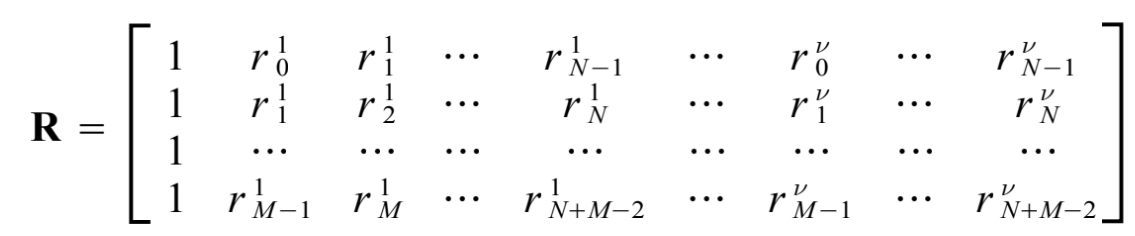




This is also referred to as the design or feature matrix, with each column being a predictor, or feature. The column of 1’s accounts for the intercept term in linear regression/decoding. Make sure you understand what this matrix means before moving on. 

We denote the target matrix (e.g. the $\textbf{M} \times 5$ matrix of finger angles) as the $\textbf{Y}$ and the reconstruction (e.g. the predicted finger angles) as $\hat{\textbf{Y}}$. Note that in Warland et al., 1997, this quantity is referred to as the stimulus vector since they are talking about decoding the stimulus from neural data after it. We, on the other hand, are trying to decode finger positions using the ECoG data before it, but we can conveniently use the same method.

Solving the minimum least-squares difference between the stimulus and reconstruction, $(\textbf{Y} - \hat{\textbf{Y}})^\text{T}(\textbf{Y} - ̂\hat{\textbf{Y}})$, we get the analytic form for the optimal filter, $$ \text{f} = (\textbf{R}^\text{T}\textbf{R})^{-1}(\textbf{R}^\text{T}\textbf{Y})$$

This equation should take a familiar form. Warland et al., 1997 don’t refer to it as such, but this is exactly the same as linear regression, one of the most commonly used algorithms in practical machine learning. Not only is this algorithm remarkably powerful, but it has a beautiful analytic form for learning the “weights” (here, the $\text{f}$ matrix), a rarity in a field where almost all optimizations involve some sort of iterative algorithm. After learning the filter weights $\text{f}$, we can calculate the optimal predictions as: $$\hat{\textbf{Y}} = \textbf{R}\text{f}$$

## Dataset
The dataset for part 1 is stored within `final_proj_part1_data.pkl`. The `.pkl` file type is a pickle file, which stores python objects. You can open the `.pkl` file with this code. 
```
with open('final_proj_part1_data.pkl', 'rb') as f:
  proj_data = pickle.load(f)
```
This stores the data inside the file as a variable named proj_data. 

**NOTE: Python versions don't pickle with each other very well. This pickle file was made in Google Colab, running Python 3.7.12. If you are running your own installation of Python and cannot load the file, we recommend you either use Colab, or make a new environment with Python 3.7.12.**

There are 3 subjects, each with their own Data Glove data (the glove they used to capture hand movements), and ECoG data. The data is represented as a dictionary with keys `'data_glove'` and `'ecog'`, storing the data glove and ecog data, respectively. These keys map to python lists of 3 items. Each item is an np.ndarray corresponding to a subject's data. See the pseudcode below.

```
proj_data = {
  'data_glove':[np.ndarray for subject 1, np.ndarray for subject 2, np.ndarray for subject 3],
  'ecog':[np.ndarray for subject 1, np.ndarray for subject 2, np.ndarray for subject 3]
}
```

All np.ndarray shapes for `'data_glove'` should be (m x 5), where m is the number of samples in the signal, and 5 is the number of fingers. 

The np.ndarray shapes for `'ecog'` are (m x 61), (m x 46), and (m x 64), where m is the number of samples in the signal, and each subject had 61, 46, and 64 ecog channels, respectively. 

**The sampling rate of the data glove and ecog was 1000 Hz**

<!-- The dataset is also on IEEG 
* Subject 1
 * I521_Sub1_Training_ecog - Training ECoG \
 * I521_Sub1_Training_dg - Training Data Glove \
 * I521_Sub1_Leaderboard_ecog - Testing ECoG
* Subject 2
 * I521_Sub2_Training_ecog - Training ECoG \
 * I521_Sub2_Training_dg - Training Data Glove \
 * I521_Sub2_Leaderboard_ecog - Testing ECoG
* Subject 3
 * I521_Sub3_Training_ecog - Training ECoG \
 * I521_Sub3_Training_dg - Training Data Glove \
 * I521_Sub3_Leaderboard_ecog - Testing ECoG -->

Your task is to develop an algorithm to use the ECoG to predict finger movements that are captured by the Data Glove.

# 1. Getting Started (4 pts)
The following sections will walk you through the development of the prediction pipeline. 

In [ ]:
#Set up the notebook environment
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from scipy.stats import pearsonr
from scipy import signal as sig
from scipy.signal import ellip,lfilter,filtfilt,find_peaks
from copy import deepcopy
from scipy import stats
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVC

## 1.
Extract the dataglove and ECoG data for each subject from the pickle file. Feel free to copy the code snippet above. Split the data into a training and testing set (at least 50% of the data should be in the training set). 

**How many samples are there in the full ECoG recording (before splitting)?** (1 pt)

**How many samples do you have in your training set? In your testing set?** (1 pt)

In [ ]:
with open('final_proj_part1_data.pkl', 'rb') as f:
  proj_data = pickle.load(f)

In [ ]:
sub1_dg = proj_data['data_glove'][0]
sub2_dg = proj_data['data_glove'][1]
sub3_dg = proj_data['data_glove'][2]

sub1_ecg = proj_data['ecog'][0]
sub2_ecg = proj_data['ecog'][1]
sub3_ecg = proj_data['ecog'][2]

In [ ]:
np.shape(sub3_ecg)

(300000, 64)

In [ ]:
split = int(0.7 * 300000)

sub1_dg_train = sub1_dg[0:split, :]
sub2_dg_train = sub2_dg[0:split, :]
sub3_dg_train = sub3_dg[0:split, :]

sub1_dg_test = sub1_dg[split:, :]
sub2_dg_test = sub2_dg[split:, :]
sub3_dg_test = sub3_dg[split:, :]

sub1_ecg_train = sub1_ecg[0:split, :]
sub2_ecg_train = sub2_ecg[0:split, :]
sub3_ecg_train = sub3_ecg[0:split, :]

sub1_ecg_test = sub1_ecg[split:, :]
sub2_ecg_test = sub2_ecg[split:, :]
sub3_ecg_test = sub3_ecg[split:, :]

**Ans:** 
- Samples in the ECoG for each subject before splitting : 300000
- Samples in training set : 210000
- Samples in testing set : 90000

## 2.
Next, complete the `filter_data` function. Test it using the raw data extracted in the prior step. What filter types and cutoff frequencies did you use? (2 pts)

Options:
- 60Hz low pass
- Sos filter

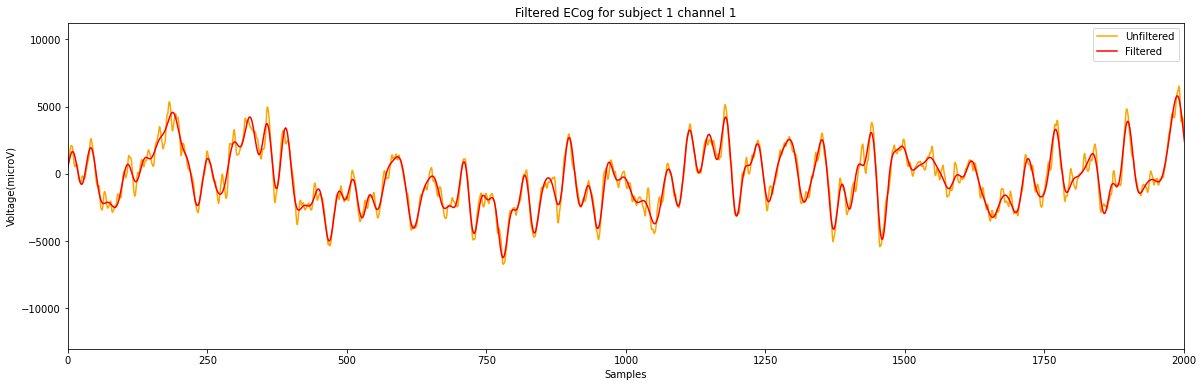

In [ ]:
def filter_data(raw_eeg, fs=1000):
  """
  Write a filter function to clean underlying data.
  Filter type and parameters are up to you. Points will be awarded for reasonable filter type, parameters and application.
  Please note there are many acceptable answers, but make sure you aren't throwing out crucial data or adversly
  distorting the underlying data!

  Input: 
    raw_eeg (samples x channels): the raw signal
    fs: the sampling rate (1000 for this dataset)
  Output: 
    clean_data (samples x channels): the filtered signal
  """
  '''
  #L-FILTER
  Wn = [300/(fs * 0.5)]
  b, a = ellip(N=8,rp=0.2,rs=3,Wn=[60,300],btype='bandpass', fs = fs)
  filtered_eeg = lfilter(b,a,raw_eeg)
  '''
  '''
  #FILT-FILT
  Wn = [60/fs, 200/fs]
  Wn = 2*Wn
  #b,a = sig.butter(10, 40, btype = 'low', output = 'ba', fs = fs)
  #filtered_eeg = filtfilt(b, a, np.transpose(raw_eeg), padlen = None)
  '''
  #SOS-FILTER
  Wn = [60/fs, 200/fs]
  Wn = 2*Wn
  sos = sig.butter(10, 40, btype = 'low', output = 'sos', fs = fs)
  filtered_eeg = sig.sosfiltfilt(sos, np.transpose(raw_eeg))
  #print(raw_eeg)

  #print(filtered_eeg)
  #plt.figure(figsize=(25,7))
  #plt.plot(raw_eeg, c = "blue")
  #plt.plot(filtered_eeg, c = "orange")
  #plt.xlim([0,2000])

  return filtered_eeg


filtered_eeg = filter_data(sub1_ecg[:,0])

plt.figure(figsize=(20,6))
plt.title("Filtered ECog for subject 1 channel 1")
plt.plot(sub1_ecg[:,0], c = "orange", label = "Unfiltered")
plt.plot(filtered_eeg, c="red", label="Filtered")
plt.xlim([0,2000])
plt.xlabel("Samples")
plt.ylabel("Voltage(microV)")
plt.legend()
plt.show()

# 2. Calculating Features (12 points)

Here you will complete the `get_windowed_feats` and `get_features` functions. 

## 1. 
We will calculate features across sliding time windows. if we use a suggested window length of 100ms with a 50ms window overlap, how many feature windows, $M$, will we have if we computed features using all the data in a given subject? Feel free to re-use code from previous homeworks. 

In [ ]:
def NumWins(x,fs,winLen,winDisp):
  M =np.floor(((len(x)/fs) - winLen + winDisp)/ winDisp)
  return int(M)

In [ ]:
#For subject 1 ECog Data
M1 = NumWins(sub1_ecg, 1000, 0.100, 0.05)
M1

5998

In [ ]:
#For subject 2 ECog Data
M2 = NumWins(sub2_ecg, 1000, 0.100, 0.05)
M2

5998

In [ ]:
#For subject 3 ECog Data
M3 = NumWins(sub3_ecg, 1000, 0.100, 0.05)
M3

5998

## 2.
Now complete the `get_features` function. Please create **4 or more** different features to calculate for each channel in each time window. Features may include the average time-domain voltage, or the average frequency-domain magnitude in consecutive 15Hz frequency bands, bandpower of relevant frequency bands, etc...

Features we include:
- Area
- Energy
- Zero-Crossings
- Line-Length
- Average time-domain voltage
- Average frequency-domain magnitude in consecutive 15Hz frequency bands


In [ ]:
def LL_x(points):
  ll_x = np.sum(np.absolute(np.ediff1d(points))) 
  return ll_x 

def Area(x):
  A_x = np.sum(np.absolute(x))
  return A_x

def Energy(x):
  E_x = np.sum(np.square(x))
  return E_x

def Zero_crossings(x):
  mean = np.mean(x)
  ZX_x=[]
  for i in range(1,len(x)):
    FromAbove = (((x[i-1] - mean) > 0) and ((x[i] - mean) < 0))
    FromBelow = (((x[i-1] - mean) < 0) and ((x[i] - mean) > 0))
    if FromAbove or FromBelow:
      result=1
    else:
      result=0
    ZX_x.append(result)
  return sum(ZX_x)

def Avg_voltage(x):
  avg_vol = np.mean(x)
  return avg_vol

#--------TO-DO:----------
def Avg_Freq(x): 
  _, _, Sxx = sig.spectrogram(x, fs=15)
  return np.mean(Sxx)

In [ ]:
def get_features(filtered_window, fs=1000):
  """
    Write a function that calculates features for a given filtered window. 
    Feel free to use features you have seen before in this class, features that
    have been used in the literature, or design your own!

    Input: 
      filtered_window (window_samples x channels): the window of the filtered ecog signal 
      fs: sampling rate
    Output:
      features (channels x num_features): the features calculated on each channel for the window
  """
  channels = np.shape(filtered_window)[1]
  features = np.empty([channels, 6])

  for ch in range(channels):
    feat1 = LL_x(filtered_window[:,ch])
    feat2 = Area(filtered_window[:,ch])
    feat3 = Energy(filtered_window[:,ch])
    feat4 = Zero_crossings(filtered_window[:,ch])
    feat5 = Avg_voltage(filtered_window[:,ch])
    feat6 = Avg_Freq(filtered_window[:,ch])
    features[ch,:] = [feat1, feat2, feat3, feat4, feat5, feat6]
   
  features = np.reshape(features,(channels*6))

  return features

## 3.
Now finish the `get_windowed_feats` function by putting the `filter_data` and `get_features` functions together to return a feature vector for each time window.

In [ ]:
def get_windowed_feats(raw_ecog, fs, window_length, window_overlap):
  """
    Write a function which processes data through the steps of filtering and
    feature calculation and returns features. Points will be awarded for completing
    each step appropriately (note that if one of the functions you call within this script
    returns a bad output, you won't be double penalized). Note that you will need
    to run the filter_data and get_features functions within this function. 

    Inputs:
      raw_eeg (samples x channels): the raw signal
      fs: the sampling rate (1000 for this dataset)
      window_length: the window's length
      window_overlap: the window's overlap
    Output: 
      all_feats (num_windows x (channels x features)): the features for each channel for each time window
        note that this is a 2D array. 
  """
  filtered_eeg = np.empty(np.shape(raw_ecog))
  
  for ch in range(np.shape(raw_ecog)[1]):
    filtered_eeg[:,ch] = filter_data(raw_ecog[:,ch])

  M = NumWins(filtered_eeg, fs, window_length, window_overlap)
  xLen = len(filtered_eeg)
  
  L = window_length
  d = window_overlap

  feature_vector = []
  for i in range(int(M)):
    feature_values = get_features(filtered_eeg[int(xLen - ((L+i*d)*fs)) : int(xLen-(i*d*fs)), :])
    feature_vector.append(feature_values)
  feature_vector = np.array(feature_vector)

  return feature_vector

In [ ]:
feats = get_windowed_feats(sub1_ecg, 1000, 0.1,0.05)
feats

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  .format(nperseg, input_length))
/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 99, using nperseg = 99
  .format(nperseg, input_length))
/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 101, using nperseg = 101
  .format(nperseg, input_length))


array([[ 1.61547728e+04,  1.01714596e+05,  1.55768666e+08, ...,
         2.00000000e+00, -6.22226660e+02,  8.15371367e+05],
       [ 1.62217483e+04,  1.24638077e+05,  2.17718643e+08, ...,
         4.00000000e+00,  3.83854481e+02,  3.91709787e+05],
       [ 1.49548186e+04,  1.44240187e+05,  3.14796571e+08, ...,
         3.00000000e+00, -7.53709020e+01,  3.71740831e+05],
       ...,
       [ 1.37422802e+04,  2.26558416e+05,  6.71672256e+08, ...,
         4.00000000e+00, -2.82223001e+02,  1.51078523e+05],
       [ 9.20292273e+03,  1.89713093e+05,  5.75284220e+08, ...,
         3.00000000e+00,  1.00417394e+03,  4.58886603e+05],
       [ 9.62478101e+03,  1.23627225e+05,  2.16804015e+08, ...,
         1.00000000e+00,  2.86583522e+02,  5.93799747e+05]])

In [ ]:
np.shape(feats)

(5998, 366)

# 3. Creating the Response Matrix (6 points)
In this section, you will develop code for your *create_R_matrix* function

## 1.
For our set of 62 channels in subject 1, what would the dimensions of the R matrix be if we calculated 6 dierent feature types per channel, and N = 3 time bins where the number of total time bins M is the number you calculated in 2.1? (1pt)

**Ans : (M x (6 x N x 62 + 1)) = (5998 x 1117) => 5998 rows and 1117 columns**

          

## 2. 
We do not have feature data to fill out the first N-1 data rows in the R matrix that will be used to predict the first N-1 finger angles. One way to work around this is to append a copy of the first N-1 rows of your feature matrix to the beginning of your feature matrix before calculating R. Make this adjustment in `create_R_matrix`, then compute the response matrix R. You can test whether your function is running correctly by running `create_R_matrix` with data from `testRfunction.pkl` using 3 windows and verifying that the quantity `np.mean(R)` is 25.4668 (5 points).

In [ ]:
def create_R_matrix(features, N_wind):
  """ 
  Write a function to calculate the R matrix

  Input:
    features (samples (number of windows in the signal) x channels x features): 
      the features you calculated using get_windowed_feats
    N_wind: number of windows to use in the R matrix

  Output:
    R (samples x (N_wind*channels*features))
  """
  M, ch = np.shape(features)
  feats2 = np.empty([M+N_wind-1, ch])
  
  feats2[N_wind-1:,:] = deepcopy(features)
  for i in range(0,N_wind-1):
    feats2[i, :] = deepcopy(features[i,:])
  
  R = np.empty([M, ch*N_wind + 1])
  R[:,0] = np.ones((M))

  for i in range(2, np.shape(feats2)[0]):
    R[i-2, 1:] = np.concatenate((feats2[i-2,:], feats2[i-1,:], feats2[i,:]), axis=None)

  return R

In [ ]:
R = create_R_matrix(feats, 3)
print(R)

[[ 1.00000000e+00  1.61547728e+04  1.01714596e+05 ...  2.00000000e+00
  -6.22226660e+02  8.15371367e+05]
 [ 1.00000000e+00  1.62217483e+04  1.24638077e+05 ...  4.00000000e+00
   3.83854481e+02  3.91709787e+05]
 [ 1.00000000e+00  1.61547728e+04  1.01714596e+05 ...  3.00000000e+00
  -7.53709020e+01  3.71740831e+05]
 ...
 [ 1.00000000e+00  1.26925735e+04  1.88098923e+05 ...  4.00000000e+00
  -2.82223001e+02  1.51078523e+05]
 [ 1.00000000e+00  1.52846554e+04  1.24798142e+05 ...  3.00000000e+00
   1.00417394e+03  4.58886603e+05]
 [ 1.00000000e+00  1.37422802e+04  2.26558416e+05 ...  1.00000000e+00
   2.86583522e+02  5.93799747e+05]]


In [ ]:
with open('/content/testRfunction.pkl', 'rb') as f:
  R_test = pickle.load(f)

In [ ]:
print(R_test)

[[17 22 27 ...  3 33 11]
 [ 1 41 35 ...  6  3 47]
 [45 49 33 ... 30 23 41]
 ...
 [ 2 46 22 ...  1 26 27]
 [12 47 44 ...  8  5 12]
 [40 12 18 ... 11 34 45]]


In [ ]:
test_R = create_R_matrix(R_test, 3)
print(np.mean(test_R))

25.46678519830894


# 4. ML Training and Testing (10 points)
Here we will use the optimal linear decoder framework to predict finger angles, and additionally you will use one or more classifiers of your own choosing to make the prediction.

## 1. 

Calculate the linear filter $\text{f}$ as defined above for all 5 finger angles using features calculated from your training data. You will have to first down-sample the finger flexion data so that your feature matrix, $\textbf{R}$, and your flexion data have the same number of time windows.

You will likely find [np.matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html), and [np.linalg.inv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to be useful. 

In [ ]:
def get_windowed_dg(raw_dg, fs, window_length, window_overlap):

  M = NumWins(raw_dg, fs, window_length, window_overlap)
  xLen = len(raw_dg)
  
  L = window_length
  d = window_overlap

  downsampled_dg = np.empty((M, 5))
  for i in range(int(M)):
    for ch in range(5):
      feat = np.mean(raw_dg[int(xLen - ((L+i*d)*fs)) : int(xLen-(i*d*fs)), ch])
      downsampled_dg[i,ch] = feat

  return downsampled_dg

In [ ]:
Y = get_windowed_dg(sub1_dg, 1000, 0.1, 0.05 )      #windows for true labels

In [ ]:
np.shape(Y)

(5998, 5)

In [ ]:
f = np.matmul(np.linalg.pinv(np.matmul(R.T, R)),np.matmul(R.T, Y))

In [ ]:
y_hat = np.matmul(R,f)          #predicted labels

## 2.
Try one other machine learning classifier using your features and finger angle labels. Look back through previous homeworks to get some ideas

**Checking the correlation between different features**

In [ ]:
X_train1 = get_windowed_feats(sub1_ecg_train, 1000, 0.1,0.05)
X_test1 = get_windowed_feats(sub1_ecg_test, 1000, 0.1,0.05)

y_train1 = get_windowed_dg(sub1_dg_train, 1000, 0.1, 0.05)
y_test1 = get_windowed_dg(sub1_dg_test, 1000, 0.1, 0.05) 

In [ ]:
feats_train1 = pd.DataFrame(data = X_train1)
feats_test1 = pd.DataFrame(data = X_test1)

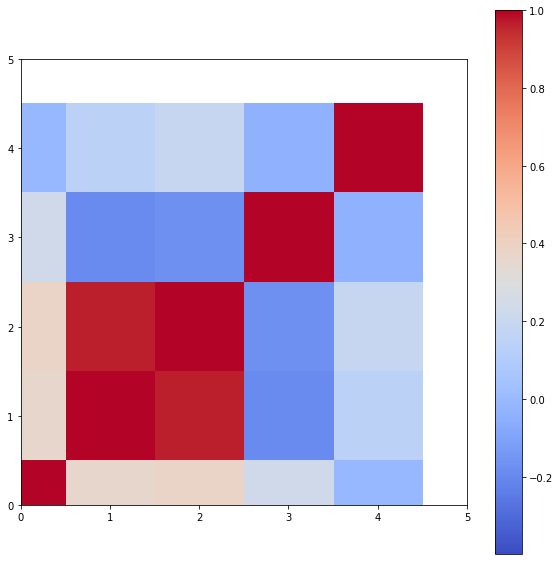

In [ ]:
plt.figure(figsize=(10,10))
Pearson = feats_train1.corr(method = 'pearson')
plt.imshow(Pearson, cmap = 'coolwarm')
plt.xlim([0,5])
plt.ylim([0,5])
plt.colorbar()
plt.show()

Because Area and Energy are highly correlated, we choose only the Energy feature among the two and eliminate Area. We also eliminated Line Length as from the previous assignments Energy emerged out as the best feature among the three.

In [ ]:
def get_features2(filtered_window, fs=1000):
  """
    Write a function that calculates features for a given filtered window. 
    Feel free to use features you have seen before in this class, features that
    have been used in the literature, or design your own!

    Input: 
      filtered_window (window_samples x channels): the window of the filtered ecog signal 
      fs: sampling rate
    Output:
      features (channels x num_features): the features calculated on each channel for the window
  """
  channels = np.shape(filtered_window)[1]
  features = np.empty([channels, 3])

  for ch in range(channels):
    feat1 = Energy(filtered_window[:,ch])
    feat2 = Avg_voltage(filtered_window[:,ch])
    feat3 = Zero_crossings(filtered_window[:,ch])
  
    features[ch,:] = [feat1, feat2, feat3]
   
  features = np.reshape(features,(channels*3))

  return features

In [ ]:
def get_windowed_feats2(raw_ecog, fs, window_length, window_overlap):
  """
    Write a function which processes data through the steps of filtering and
    feature calculation and returns features. Points will be awarded for completing
    each step appropriately (note that if one of the functions you call within this script
    returns a bad output, you won't be double penalized). Note that you will need
    to run the filter_data and get_features functions within this function. 

    Inputs:
      raw_eeg (samples x channels): the raw signal
      fs: the sampling rate (1000 for this dataset)
      window_length: the window's length
      window_overlap: the window's overlap
    Output: 
      all_feats (num_windows x (channels x features)): the features for each channel for each time window
        note that this is a 2D array. 
  """
  filtered_eeg = np.empty(np.shape(raw_ecog))
  
  for ch in range(np.shape(raw_ecog)[1]):
    filtered_eeg[:,ch] = filter_data(raw_ecog[:,ch])

  M = NumWins(filtered_eeg, fs, window_length, window_overlap)
  xLen = len(filtered_eeg)
  
  L = window_length
  d = window_overlap

  feature_vector = []
  for i in range(int(M)):
    feature_values = get_features2(filtered_eeg[int(xLen - ((L+i*d)*fs)) : int(xLen-(i*d*fs)), :])
    feature_vector.append(feature_values)
  feature_vector = np.array(feature_vector)

  return feature_vector

In [ ]:
X_train = get_windowed_feats2(sub1_ecg_train, 1000, 0.1,0.05)
X_test = get_windowed_feats2(sub1_ecg_test, 1000, 0.1,0.05)

y_train = get_windowed_dg(sub1_dg_train, 1000, 0.1, 0.05)
y_test = get_windowed_dg(sub1_dg_test, 1000, 0.1, 0.05) 

In [ ]:
feats_train = pd.DataFrame(data = X_train)
norm_data = np.empty([np.shape(X_train)[1], 2])
ind = 0

for (columnName, columnData) in feats_train.iteritems():
  std = np.std(columnData.values)
  mean = np.mean(columnData.values)
  norm_data[ind,0] = mean
  norm_data[ind,1] = std
  ind+=1

  feats_train[columnName] = (feats_train[columnName] - mean)/std

feats_train = feats_train.dropna(axis=1)

feats_train



,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,182
0,-0.441677,-0.320016,-1.806785,-0.049403,-0.927825,-1.011696,-0.047768,-0.671461,-0.224432,-0.282368,...,-0.281084,-0.369114,-0.550131,0.052128,-0.287115,0.215523,0.123071,-0.448563,0.494324,0.789771
1,-0.275569,-1.006234,0.418051,0.129604,-0.896496,-0.157976,0.485141,-1.525797,-0.224432,-0.272281,...,0.514784,-0.267219,-1.013542,0.786648,-0.492010,-0.235030,0.123071,-0.597475,0.253281,0.789771
2,-0.462013,-0.542458,-0.323561,-0.384652,-0.225526,0.695745,0.126076,-0.811205,-0.224432,-0.393076,...,-1.076953,-0.592961,-0.670638,2.990208,-0.374584,0.553448,0.123071,-0.610367,0.277100,0.051021
3,-0.711625,-0.148406,0.418051,-0.624145,-0.059429,1.549465,-0.340313,0.523773,-0.224432,-0.391132,...,1.310652,-0.706761,0.049508,0.052128,-0.061718,1.067856,0.887530,-0.531363,-0.239332,-1.426479
4,-1.012719,-0.087934,1.159663,-0.587972,0.239969,0.695745,-0.233830,1.160587,0.517608,-0.300780,...,-0.281084,-0.623031,0.634786,2.990208,0.010116,-0.066705,-0.641389,-0.310269,-0.770949,0.789771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,-0.653030,0.030126,0.418051,0.509983,1.185372,-1.011696,-0.195974,-0.982261,0.517608,-0.387916,...,-0.281084,-0.368843,-0.621894,-0.682392,-0.122917,-0.932979,-0.641389,-0.523423,-0.364622,0.789771
4195,0.539675,1.103051,-1.065173,-0.221020,0.504366,-0.157976,-0.421184,-0.089293,-0.966473,-0.381623,...,-0.281084,-0.463195,-0.547565,-1.416911,-0.189040,-0.709276,0.123071,-0.516861,-0.137842,0.789771
4196,0.295862,1.239602,-1.806785,0.245280,1.168789,-0.157976,-0.547969,0.366823,-0.224432,-0.232713,...,-0.281084,-0.595815,0.461645,0.786648,-0.446680,0.124971,-0.641389,-0.248650,0.499443,0.051021
4197,-0.612956,-0.481121,-1.065173,-0.000619,0.523771,-1.011696,-0.590348,-0.225913,-0.966473,-0.280514,...,-1.076953,-0.514235,0.216784,0.052128,-0.404955,0.632820,0.887530,-0.153826,0.134643,-1.426479


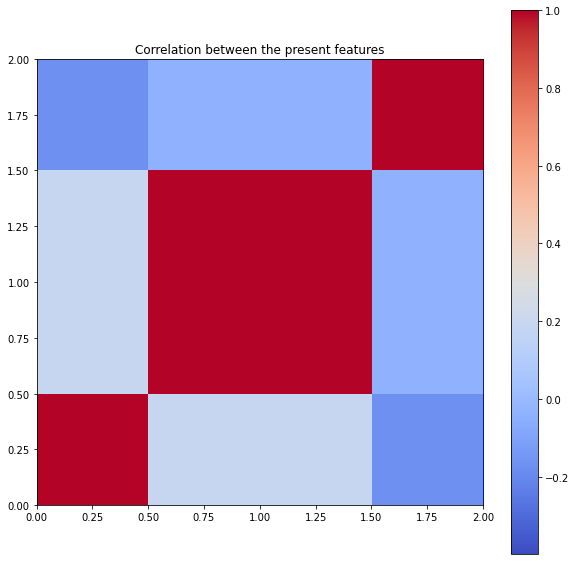

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Correlation between the present features")
Pearson = feats_train.corr(method = 'pearson')
plt.imshow(Pearson, cmap = 'coolwarm')
plt.xlim([0,2])
plt.ylim([0,2])
plt.colorbar()
plt.show()

In [ ]:
feats_test = pd.DataFrame(data = X_test)
indy = 0

for (columnName, columnData) in feats_test.iteritems():
  mean = norm_data[indy,0]
  std = norm_data[indy,1]
  indy+=1

  feats_test[columnName] = (feats_test[columnName] - mean)/std

feats_test = feats_test.dropna(axis=1)

feats_test

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,182
0,-0.763780,-0.254483,1.901275,-0.579581,0.187820,2.403185,-0.633400,0.461527,1.259649,-0.016533,...,-1.076953,-0.611149,0.610869,0.052128,0.339350,-1.207266,-0.641389,-0.040469,-0.306510,-0.687729
1,-0.607260,-0.154943,0.418051,-0.226122,-0.238980,1.549465,-0.237063,0.686915,2.001690,-0.271190,...,0.514784,-0.376462,0.783673,0.786648,-0.121689,-0.441076,-1.405848,-0.333939,0.192583,0.789771
2,-0.361988,0.300862,0.418051,-0.159778,-0.016145,-1.011696,1.860834,1.905860,-0.966473,-0.346186,...,-1.076953,0.077351,1.263786,1.521168,-0.518681,0.396385,0.887530,-0.353227,-0.035228,0.051021
3,-0.581109,0.740146,0.418051,-0.492915,0.474025,0.695745,1.181321,1.548608,-1.708514,-0.389086,...,-0.281084,-0.222929,0.854769,-1.416911,-0.557029,0.338317,0.123071,-0.403920,0.421751,0.051021
4,0.704757,1.512227,-1.806785,-0.337970,0.632291,0.695745,-0.540487,0.872609,-0.224432,-0.294275,...,1.310652,-0.026835,0.939980,-0.682392,-0.478545,0.461132,0.887530,-0.369463,0.688917,0.051021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,0.706626,-1.132198,-1.065173,0.288055,-0.022284,-0.157976,0.795930,-1.126988,-0.224432,-0.018935,...,-1.076953,-0.068176,-0.109249,0.052128,0.518981,-1.302189,-0.641389,-0.303378,-0.558204,-1.426479
1795,2.081579,-1.627868,-1.065173,-0.298290,0.073469,-0.157976,1.483745,-1.460026,-0.966473,-0.140028,...,-0.281084,0.608721,-0.885814,-0.682392,0.450129,-1.237544,-0.641389,-0.247233,-0.843278,0.051021
1796,1.673205,-1.253586,-1.065173,-0.512170,-0.234869,-0.157976,-0.058892,-0.692962,-0.224432,-0.274217,...,0.514784,0.310089,-0.292807,-0.682392,0.028958,-1.182210,0.123071,-0.224251,0.399527,0.051021
1797,0.832283,-1.427424,-0.323561,-0.425288,-0.095391,-1.011696,-0.600996,-0.014878,0.517608,-0.375000,...,0.514784,-0.377819,0.521960,-0.682392,-0.267778,-0.519480,-0.641389,-0.134317,1.052494,0.051021


In [ ]:
target_train = []
for row in y_train:
  target_train.append(np.where(row == max(row))[0][0])

target_test = []
for row in y_test:
  target_test.append(np.where(row == max(row))[0][0])

**Model before Feature selection using Sequential Forward Selection**

In [ ]:
ridgereg=Ridge(alpha=5)
ridgereg.fit(feats_train,y_train)
ridgereg.score(feats_test,y_test)

-0.2915752056332553

In [ ]:
test_pred_before = []
y_pred_before = ridgereg.predict(feats_test)
for row in y_pred_before:
  test_pred_before.append(np.where(row == max(row))[0][0])

In [ ]:
acc = 0
for pair in zip(test_pred_before, target_test):
  if pair[0]==pair[1]:
    acc+=1
print(acc*100/len(target_test))

17.676486937187327


**Accuracy before Feature selection using Sequential Forward Selection** : 17.68%

**Feature selection using Sequential Forward Selection**

In [ ]:
sfs = SFS(LinearRegression(),
           k_features=100,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)

sfs.fit(feats_train, y_train)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(49,)",[0.009224836330670439],0.009225,"(49,)"
2,"(49, 72)",[0.01446007375303473],0.01446,"(49, 72)"
3,"(49, 72, 130)",[0.0183414732944299],0.018341,"(49, 72, 130)"
4,"(49, 72, 130, 171)",[0.02180935631449521],0.021809,"(49, 72, 130, 171)"
5,"(2, 49, 72, 130, 171)",[0.025321990224580725],0.025322,"(2, 49, 72, 130, 171)"
...,...,...,...,...
96,"(0, 1, 2, 5, 7, 11, 12, 15, 20, 21, 23, 28, 33...",[0.12675911147901367],0.126759,"(0, 1, 2, 5, 7, 11, 12, 15, 20, 21, 23, 28, 33..."
97,"(0, 1, 2, 5, 7, 11, 12, 15, 20, 21, 23, 27, 28...",[0.12715973197005542],0.12716,"(0, 1, 2, 5, 7, 11, 12, 15, 20, 21, 23, 27, 28..."
98,"(0, 1, 2, 5, 7, 11, 12, 15, 20, 21, 23, 27, 28...",[0.12756980104086424],0.12757,"(0, 1, 2, 5, 7, 11, 12, 15, 20, 21, 23, 27, 28..."
99,"(0, 1, 2, 5, 7, 11, 12, 15, 20, 21, 23, 27, 28...",[0.12796762732623343],0.127968,"(0, 1, 2, 5, 7, 11, 12, 15, 20, 21, 23, 27, 28..."


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


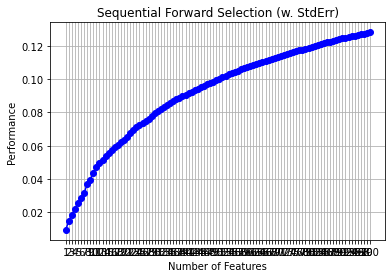

In [ ]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()


In [ ]:
X_train_sfs = sfs.transform(feats_train)
X_test_sfs = sfs.transform(feats_test)

**Model after Feature selection**

In [ ]:
ridgereg2=Ridge(alpha=5)
ridgereg2.fit(X_train_sfs,y_train)
ridgereg2.score(X_test_sfs,y_test)

-0.24749714049243132

In [ ]:
test_pred = []
y_pred = ridgereg2.predict(X_test_sfs)
for row in y_pred:
  test_pred.append(np.where(row == max(row))[0][0])

In [ ]:
acc = 0
for pair in zip(test_pred, target_test):
  if pair[0]==pair[1]:
    acc+=1
print(acc*100/len(target_test))

18.28793774319066


**Accuracy after feature selection** : 18.29% 

**We have also tried SVM to just identify which finger is being moved (after feature selection).**

In [ ]:
svmmodel = SVC(kernel='rbf')
svmmodel.fit(X_train_sfs,target_train)
test_score_svm=svmmodel.score(X_test_sfs,target_test) 
print("TestingScore(SVM):",test_score_svm)

TestingScore(SVM): 0.21067259588660367


This gave us an accuracy of ~21%

**___**

**Subject 2:**

In [ ]:
X_train2 = get_windowed_feats2(sub2_ecg_train, 1000, 0.1,0.05)
X_test2 = get_windowed_feats2(sub2_ecg_test, 1000, 0.1,0.05)

y_train2 = get_windowed_dg(sub2_dg_train, 1000, 0.1, 0.05)
y_test2 = get_windowed_dg(sub2_dg_test, 1000, 0.1, 0.05) 

In [ ]:
feats_train2 = pd.DataFrame(data = X_train2)
norm_data2 = np.empty([np.shape(X_train2)[1], 2])
ind = 0

for (columnName, columnData) in feats_train2.iteritems():
  std = np.std(columnData.values)
  mean = np.mean(columnData.values)
  norm_data2[ind,0] = mean
  norm_data2[ind,1] = std
  ind+=1

  feats_train2[columnName] = (feats_train2[columnName] - mean)/std

feats_train2 = feats_train2.dropna(axis=1)

feats_test2 = pd.DataFrame(data = X_test2)
indy = 0

for (columnName, columnData) in feats_test2.iteritems():
  mean = norm_data2[indy,0]
  std = norm_data2[indy,1]
  indy+=1

  feats_test2[columnName] = (feats_test2[columnName] - mean)/std

feats_test2 = feats_test2.dropna(axis=1)

target_train2 = []
for row in y_train2:
  target_train2.append(np.where(row == max(row))[0][0])

target_test2 = []
for row in y_test2:
  target_test2.append(np.where(row == max(row))[0][0])

sfs2 = SFS(LinearRegression(),
           k_features=100,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)

sfs2.fit(feats_train2, y_train2)
X_train_sfs2 = sfs2.transform(feats_train2)
X_test_sfs2 = sfs2.transform(feats_test2)

ridgereg22=Ridge(alpha=5)
ridgereg22.fit(X_train_sfs2,y_train2)
print("Ridge Score ",ridgereg22.score(X_test_sfs2,y_test2))

test_pred2 = []
y_pred2 = ridgereg22.predict(X_test_sfs2)
for row in y_pred2:
  test_pred2.append(np.where(row == max(row))[0][0])

acc2 = 0
for pair in zip(test_pred2, target_test2):
  if pair[0]==pair[1]:
    acc2+=1
print(acc2*100/len(target_test2))

Ridge Score  -4.9606933735892294e+17
14.563646470261256




---



**Subject 3**

In [ ]:
X_train3 = get_windowed_feats2(sub3_ecg_train, 1000, 0.1,0.05)
X_test3 = get_windowed_feats2(sub3_ecg_test, 1000, 0.1,0.05)

y_train3 = get_windowed_dg(sub3_dg_train, 1000, 0.1, 0.05)
y_test3 = get_windowed_dg(sub3_dg_test, 1000, 0.1, 0.05) 

In [ ]:
feats_train3 = pd.DataFrame(data = X_train3)
norm_data3 = np.empty([np.shape(X_train3)[1], 2])
ind = 0

for (columnName, columnData) in feats_train3.iteritems():
  std = np.std(columnData.values)
  mean = np.mean(columnData.values)
  norm_data3[ind,0] = mean
  norm_data3[ind,1] = std
  ind+=1

  feats_train3[columnName] = (feats_train3[columnName] - mean)/std

feats_train3 = feats_train3.dropna(axis=1)

feats_test3 = pd.DataFrame(data = X_test3)
indy = 0

for (columnName, columnData) in feats_test3.iteritems():
  mean = norm_data3[indy,0]
  std = norm_data3[indy,1]
  indy+=1

  feats_test3[columnName] = (feats_test3[columnName] - mean)/std

feats_test3 = feats_test3.dropna(axis=1)

target_train3 = []
for row in y_train3:
  target_train3.append(np.where(row == max(row))[0][0])

target_test3 = []
for row in y_test3:
  target_test3.append(np.where(row == max(row))[0][0])

sfs3 = SFS(LinearRegression(),
           k_features=100,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)

sfs3.fit(feats_train3, y_train3)
X_train_sfs3 = sfs3.transform(feats_train3)
X_test_sfs3 = sfs3.transform(feats_test3)

ridgereg23=Ridge(alpha=5)
ridgereg23.fit(X_train_sfs3,y_train3)
print("Ridge Score ",ridgereg23.score(X_test_sfs3,y_test3))

test_pred3 = []
y_pred3 = ridgereg23.predict(X_test_sfs3)
for row in y_pred3:
  test_pred3.append(np.where(row == max(row))[0][0])

acc3 = 0
for pair in zip(test_pred3, target_test3):
  if pair[0]==pair[1]:
    acc3+=1
print(acc3*100/len(target_test3))

Ridge Score  -0.19434975700882046
23.457476375764312


## 3. 
Produce predictions on the testing set for each finger angle. Calculate the correlation coefficient between the predicted and test finger angles for each finger separately. Report you correlations here using the lineare filter, and when using the other classifier(s) that you tried. 

You will find  [pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) to be helpful and already imported. 

**Correlations for the linear filter in 4.1**

In [ ]:
stats.pearsonr(np.amax(y_hat, axis = 1), np.amax(Y, axis = 1))

(0.6687473886518375, 0.0)

**Correlations for subject 1 in 4.2**

In [ ]:
y_pred01 = ridgereg2.predict(X_test_sfs)
a = stats.pearsonr(y_test[:,0], y_pred01[:,0])
b = stats.pearsonr(y_test[:,1], y_pred01[:,1])
c = stats.pearsonr(y_test[:,2], y_pred01[:,2])
d = stats.pearsonr(y_test[:,3], y_pred01[:,3])
e = stats.pearsonr(y_test[:,4], y_pred01[:,4])
print("Pearson Coefficient :", (a[0]+b[0]+c[0]+d[0]+e[0])/5)

Pearson Coefficient : 0.11057033580064615


**Correlations for subject 2 in 4.2**

In [ ]:
y_pred02 = ridgereg22.predict(X_test_sfs2)
a = stats.pearsonr(y_test2[:,0], y_pred02[:,0])
b = stats.pearsonr(y_test2[:,1], y_pred02[:,1])
c = stats.pearsonr(y_test2[:,2], y_pred02[:,2])
d = stats.pearsonr(y_test2[:,3], y_pred02[:,3])
e = stats.pearsonr(y_test2[:,4], y_pred02[:,4])
print("Pearson Coefficient :", (a[0]+b[0]+c[0]+d[0]+e[0])/5)

Pearson Coefficient : 0.043796609311200205


**Correlations for subject 3 in 4.2**

In [ ]:
y_pred03 = ridgereg23.predict(X_test_sfs3)
a = stats.pearsonr(y_test3[:,0], y_pred03[:,0])
b = stats.pearsonr(y_test3[:,1], y_pred03[:,1])
c = stats.pearsonr(y_test3[:,2], y_pred03[:,2])
d = stats.pearsonr(y_test3[:,3], y_pred03[:,3])
e = stats.pearsonr(y_test3[:,4], y_pred03[:,4])
print("Pearson Coefficient :", (a[0]+b[0]+c[0]+d[0]+e[0])/5)

Pearson Coefficient : 0.271166252084038


**Average Pearson for all the 3 subjects :**

In [ ]:
(0.1105 + 0.0438 + 0.2712)/3

0.14183333333333334